# Numerical Optimization Assignment 2
## Introduction
In this assignment, we expect you to be familiar with the Pytorch optimizer library. We are using the Rosenbrock function as the benchmark of our optimization algorithms again. Since this is a simple test on very small scale, CUDA is not needed. You need to install Pytorch to acquire the pre-defined optimizers.  
The library document link: https://pytorch.org/docs/stable/optim.html

## Task
1. (40%) Please try at least 4 different optimizers and observe the behavior of them, and try different hyperparameters and observe if they behave differently. (In case of L-BFGS, the parameters wrapped in this sample code won't work. If you want to try it anyway, you will need to write your own code.) Whether if your setting converges or not, please justify it by experiment or your hyperthesis.
2. (40%) Please write a concise report about your experiments and analysis. If you need to plot tables, please check the following link: https://www.tablesgenerator.com/markdown_tables
3. (20%) Please answer the following question in your report:  
    (a) What is the relation between SGD and GD(gradient descent) in our case, i.e. when the input is one-dimensional?  
    (b) Have you found effective way to set hyperparameters so they can iterate faster toward the minimum point?
4. Rename this notebook file by adding your student ID and upload it to eeclass platform. (ex. hw2_110xxxxxx.ipynb)

##  Advanced Technique: Learning rate scheduler
Another technique to find hyperparameter for learning rate is to perform scheduled adjestments of learning rate. This is called 'learning rate scheduler'. The adjestments here not only affected by current learning rate and momentum etc., but also the epoch number or step numbers. Usually, in these kind of method, we are presuming the optimal hyperparameters can be found by recognizing certain patterns, and we schedule the experiments to search the proper parameters in such manner. You can also apply these function in your code. The library document of learning rate scheduler is in the same link above.



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.optim as optim

In [2]:
def rosenbrock(tensor):
    # since pytorch uses tensor, we don't use built-in function here
    x, y = tensor
    return (1 - x) ** 2 + 100 * (y - x ** 2) ** 2

def execute_steps(func, initial_state, optimizer_class, optimizer_config, num_iter=500):
    x = torch.Tensor(initial_state).requires_grad_(True)
    optimizer = optimizer_class([x], **optimizer_config)
    steps = []
    steps = np.zeros((2, num_iter))
    steps[:, 0] = np.array(initial_state)
    last_f = torch.tensor([100., 100.])
    for i in range(0, num_iter):
        optimizer.zero_grad()
        f = func(x)
        f.backward(create_graph=True, retain_graph=True)
        torch.nn.utils.clip_grad_norm_(x, 1.0)
        optimizer.step()
        steps[:, i] = x.detach().numpy()
    return steps

def plot_rosenbrok(grad_iter, optimizer_name):
    x = np.linspace(-2, 2, 250)
    y = np.linspace(-1, 3, 250)
    minimum = (1.0, 1.0)

    X, Y = np.meshgrid(x, y)
    Z = rosenbrock([X, Y])

    iter_x, iter_y = grad_iter[0, :], grad_iter[1, :]

    fig = plt.figure(figsize=(8, 8))

    ax = fig.add_subplot(1, 1, 1)
    ax.contour(X, Y, Z, 90, cmap='jet')
    ax.plot(iter_x, iter_y, color='r', marker='x')

    ax.set_title('{} with {} iterations'.format(optimizer_name, len(iter_x)))
    plt.plot(*minimum, 'gD')
    plt.plot(iter_x[-1], iter_y[-1], 'rD')
    plt.show()

In [3]:
def printX(steps):
    iter_x, iter_y = steps[0, :], steps[1, :]
    i=0
    for x,y in zip(iter_x,iter_y):
        print("iteration %d: [%.4f %.4f]" %(i,x,y))
        i+=1

In [5]:
initial_state = np.array([-2,2])
# TODO: Try other optimizers!
optimizer_class = torch.optim.SGD
tol=1e-2
steps = execute_steps(
        rosenbrock,
        initial_state,
        optimizer_class,
        # TODO: Try some different hyperparameters! Note that these parameters should be wraped in a dict().
        {'lr':0.2, 'momentum':0.2, 'weight_decay':0.1},
        num_iter=5000,
    )

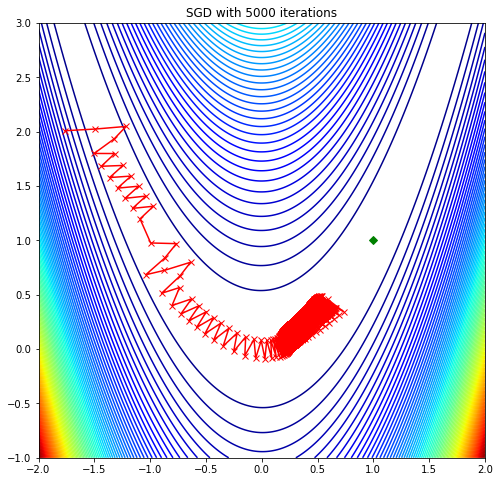

In [6]:
plot_rosenbrok(steps, optimizer_class.__name__)

In [7]:
printX(steps)

iteration 0: [-1.7659 2.0083]
iteration 1: [-1.4913 2.0240]
iteration 2: [-1.2161 2.0479]
iteration 3: [-1.3213 1.9346]
iteration 4: [-1.5018 1.7995]
iteration 5: [-1.3178 1.7986]
iteration 6: [-1.4375 1.6816]
iteration 7: [-1.2434 1.6890]
iteration 8: [-1.3635 1.5778]
iteration 9: [-1.1718 1.5911]
iteration 10: [-1.2927 1.4805]
iteration 11: [-1.1035 1.4981]
iteration 12: [-1.2246 1.3867]
iteration 13: [-1.0373 1.4074]
iteration 14: [-1.1582 1.2944]
iteration 15: [-0.9710 1.3137]
iteration 16: [-1.0909 1.1977]
iteration 17: [-0.9955 0.9760]
iteration 18: [-0.7650 0.9698]
iteration 19: [-0.8695 0.8374]
iteration 20: [-1.0397 0.6837]
iteration 21: [-0.8719 0.7243]
iteration 22: [-0.6379 0.7987]
iteration 23: [-0.7338 0.6717]
iteration 24: [-0.8984 0.5131]
iteration 25: [-0.7372 0.5657]
iteration 26: [-0.8043 0.4006]
iteration 27: [-0.6297 0.4618]
iteration 28: [-0.7243 0.3241]
iteration 29: [-0.5612 0.3993]
iteration 30: [-0.6541 0.2604]
iteration 31: [-0.4966 0.3433]
iteration 32: [-0.

iteration 1943: [0.2723 0.2408]
iteration 1944: [0.3523 0.0932]
iteration 1945: [0.2725 0.2410]
iteration 1946: [0.3526 0.0934]
iteration 1947: [0.2727 0.2413]
iteration 1948: [0.3528 0.0937]
iteration 1949: [0.2730 0.2415]
iteration 1950: [0.3531 0.0939]
iteration 1951: [0.2732 0.2417]
iteration 1952: [0.3534 0.0942]
iteration 1953: [0.2735 0.2419]
iteration 1954: [0.3537 0.0944]
iteration 1955: [0.2737 0.2422]
iteration 1956: [0.3540 0.0947]
iteration 1957: [0.2739 0.2424]
iteration 1958: [0.3542 0.0949]
iteration 1959: [0.2742 0.2426]
iteration 1960: [0.3545 0.0952]
iteration 1961: [0.2744 0.2429]
iteration 1962: [0.3548 0.0954]
iteration 1963: [0.2747 0.2431]
iteration 1964: [0.3551 0.0957]
iteration 1965: [0.2749 0.2433]
iteration 1966: [0.3554 0.0960]
iteration 1967: [0.2752 0.2436]
iteration 1968: [0.3557 0.0962]
iteration 1969: [0.2754 0.2438]
iteration 1970: [0.3560 0.0965]
iteration 1971: [0.2757 0.2441]
iteration 1972: [0.3563 0.0968]
iteration 1973: [0.2760 0.2443]
iteratio

iteration 3761: [0.4575 0.4336]
iteration 3762: [0.5594 0.3013]
iteration 3763: [0.4498 0.4298]
iteration 3764: [0.5547 0.3000]
iteration 3765: [0.4715 0.4451]
iteration 3766: [0.5845 0.3214]
iteration 3767: [0.4567 0.4344]
iteration 3768: [0.5587 0.3023]
iteration 3769: [0.4567 0.4361]
iteration 3770: [0.5639 0.3082]
iteration 3771: [0.4611 0.4414]
iteration 3772: [0.5687 0.3139]
iteration 3773: [0.4661 0.4474]
iteration 3774: [0.5745 0.3205]
iteration 3775: [0.4698 0.4525]
iteration 3776: [0.5782 0.3258]
iteration 3777: [0.4775 0.4604]
iteration 3778: [0.5876 0.3351]
iteration 3779: [0.4757 0.4616]
iteration 3780: [0.5833 0.3344]
iteration 3781: [0.5111 0.4847]
iteration 3782: [0.6309 0.3667]
iteration 3783: [0.4916 0.4674]
iteration 3784: [0.5958 0.3372]
iteration 3785: [0.4658 0.4483]
iteration 3786: [0.5687 0.3169]
iteration 3787: [0.4929 0.4653]
iteration 3788: [0.6099 0.3449]
iteration 3789: [0.4746 0.4501]
iteration 3790: [0.5775 0.3188]
iteration 3791: [0.4554 0.4371]
iteratio

## Report

Type your report here.（中英文皆可）